In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from  sklearn import datasets
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
wine=datasets.load_wine()

In [3]:
df=pd.DataFrame(wine.data,columns=wine.feature_names)
df['target'] = wine.target

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [7]:
gnb = MultinomialNB()

In [8]:
gnb.fit(x_train,y_train)

MultinomialNB()

In [9]:
gnb.classes_

array([0, 1, 2])

In [10]:
gnb.predict(x_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [11]:
gnb.predict_proba(x_test)

array([[8.37425054e-01, 1.27497079e-02, 1.49825239e-01],
       [9.99999994e-01, 2.67585322e-13, 5.89999253e-09],
       [5.93636747e-08, 1.38682167e-01, 8.61317774e-01],
       [1.00000000e+00, 1.64526232e-24, 3.88762363e-18],
       [9.57868054e-07, 8.57569472e-01, 1.42429570e-01],
       [1.00000000e+00, 8.82312670e-21, 6.64334557e-15],
       [2.11365082e-06, 9.23346035e-01, 7.66518514e-02],
       [1.66961292e-05, 8.46131247e-04, 9.99137173e-01],
       [8.68079638e-03, 9.00926343e-01, 9.03928604e-02],
       [8.33609491e-01, 4.53371124e-05, 1.66345172e-01],
       [9.99781797e-01, 1.15716893e-05, 2.06631677e-04],
       [3.20314903e-19, 8.81378576e-01, 1.18621424e-01],
       [1.00000000e+00, 2.40021747e-16, 1.21669294e-11],
       [1.44423601e-12, 9.60304517e-01, 3.96954826e-02],
       [1.00000000e+00, 3.44252913e-25, 5.41443604e-18],
       [1.51862846e-18, 9.99927623e-01, 7.23773776e-05],
       [9.49197315e-13, 9.97458852e-01, 2.54114798e-03],
       [1.01385441e-02, 5.19830

In [12]:
gnb.score(x_test,y_test)

0.8888888888888888

<h5>  Test nomality </h5>
<h6> Because GaussianNB assumes that features have a bell shape, I used Jarque Bera to check whether your data has skewness and kurtosis matching a normal distribution.   </h6> 

<dl><h5>  Hypothesis </h5>
<li> h0=  data is normally distributed </li>
<li> ha=  data is not normally distributed </li>
</dl>
 

In [13]:
results = {}
for i in df.columns:
   results[i] =  stats.jarque_bera(df[i])

In [14]:
results_df = pd.DataFrame(results, index=['statistic', 'pvalue']).T

In [15]:
results_df[results_df["pvalue"]>0.05]

,statistic,pvalue
alcohol,5.591543,0.061068
alcalinity_of_ash,2.765132,0.250934
total_phenols,5.525376,0.063122
flavanoids,5.885096,0.052731
hue,1.017508,0.601244


<h5> Interception </h5>
<h6> alcohol and alcalinity_of_ash and total_phenols and flavanoids and hue the have enough statistic significant ( pvalue >0.05) </h6>

<h5> Visualisation </h5>
<h6>    Check jarque bera result</h6>

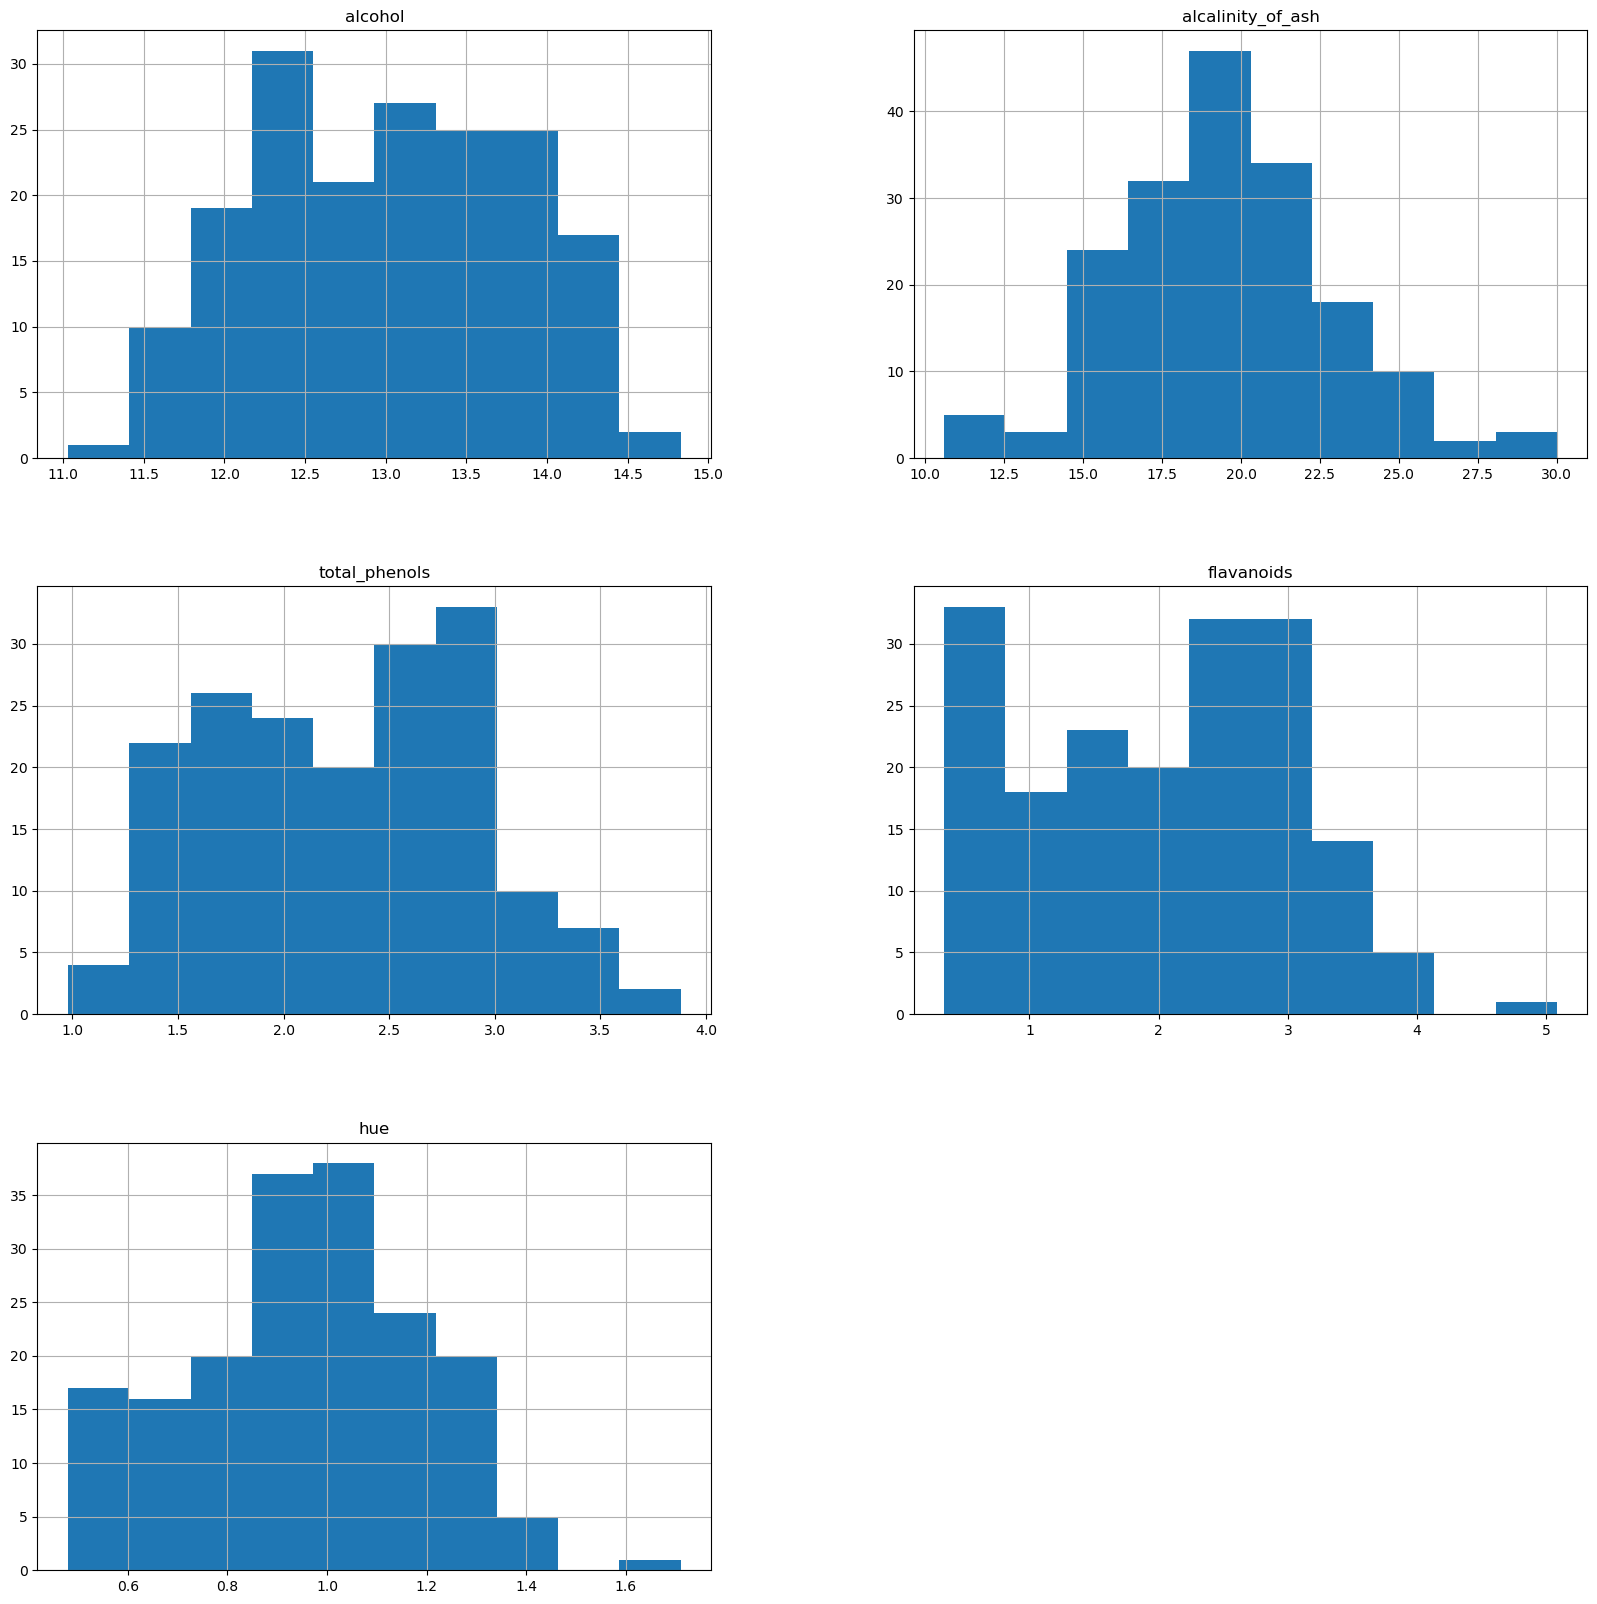

In [16]:
df[["alcohol","alcalinity_of_ash","total_phenols","flavanoids","hue"]].hist(figsize=(20,20))
plt.show()

<h5> Interception </h5>
<h6> You can guarantee the result of jraque bera is roughly bell shape </h6>

In [17]:
gnb=GaussianNB()

In [18]:
gnb.fit(x_train,y_train)

GaussianNB()

In [19]:
gnb.classes_

array([0, 1, 2])

In [20]:
gnb.predict(x_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [21]:
gnb.predict_proba(x_test)

array([[9.99991820e-01, 8.17986629e-06, 1.75844851e-31],
       [9.99999053e-01, 9.46598997e-07, 1.78086968e-25],
       [1.13448660e-18, 1.99953560e-03, 9.98000464e-01],
       [9.99999999e-01, 7.71694277e-10, 4.13905530e-37],
       [4.85016095e-07, 9.99999515e-01, 1.99877483e-22],
       [1.00000000e+00, 2.47066704e-12, 1.42452382e-33],
       [7.95594246e-11, 1.00000000e+00, 6.55702700e-13],
       [3.15918793e-21, 4.37517039e-12, 1.00000000e+00],
       [1.94710799e-04, 9.99805289e-01, 5.67647705e-29],
       [2.42169478e-15, 5.33549614e-04, 9.99466450e-01],
       [9.93827013e-01, 6.17298732e-03, 1.83781764e-32],
       [1.37658180e-18, 3.84803880e-12, 1.00000000e+00],
       [9.86542823e-01, 1.34571766e-02, 3.14047577e-20],
       [7.68155801e-16, 9.82464750e-01, 1.75352499e-02],
       [1.00000000e+00, 2.78016158e-13, 4.69430467e-35],
       [1.25924089e-07, 9.99999874e-01, 2.81153369e-15],
       [4.42564516e-11, 1.00000000e+00, 4.05508262e-12],
       [2.99568596e-12, 1.00000

In [22]:
gnb.score(x_test,y_test)

1.0